In [1]:
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt

# Plot Sound Speed Profile

## Read Files

In [8]:
ssp_basu_path = '../SoundSpeed/basu_09.txt'
column_names = [" r/R_sun", "c [cm/s]", "Sigma_c"]
ssp_obs = pd.read_csv(ssp_basu_path, delim_whitespace=True, skiprows=8, names=column_names)
#print(ssp_obs)

In [9]:
data_gs98_path = "../Models/Model1_v2/solar.profile"
data_a09_path = "../Models/Model2/solar.profile"
skiprows = 6
column_names = ["radius", "csound"]

model_gs98 = pd.read_csv(data_gs98_path, delim_whitespace=True, skiprows=skiprows, usecols=[9, 10], names=column_names)
model_a09 = pd.read_csv(data_a09_path, delim_whitespace=True, skiprows=skiprows, usecols=[9, 10], names=column_names)

#print(model_gs98)

## Interpolate the observed data
Since the observed data will be used to compare both models

(acho que em todos os fichs a velocidade do som esta em cm/s)

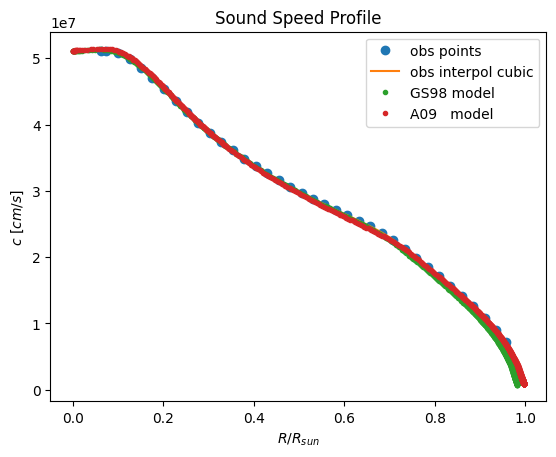

In [28]:
c_obs = interpolate.interp1d( x = ssp_obs[" r/R_sun"],
                             y = ssp_obs["c [cm/s]"], 
                             kind='cubic', 
                             bounds_error=False  # Allow extrapolation
                             )

x = np.linspace(ssp_obs[" r/R_sun"].min(), ssp_obs[" r/R_sun"].max(),100)
y = c_obs(x)

plt.plot( ssp_obs[" r/R_sun"], ssp_obs["c [cm/s]"],label = "obs points",marker="o", linestyle = 'None')
plt.plot(x,y,label='obs interpol cubic')
plt.plot(model_gs98["radius"],model_gs98["csound"], label = "GS98 model",marker=".",linestyle = 'None')
plt.plot(model_a09["radius"],model_a09["csound"],   label = "A09   model",marker=".",linestyle = 'None')

plt.legend(numpoints=1)
plt.ylabel(r"$c$ $[cm/s]$")
plt.xlabel(r"$R/R_{sun}$")
plt.title("Sound Speed Profile")

plt.show()


# Comparison of Sound Speed Profiles

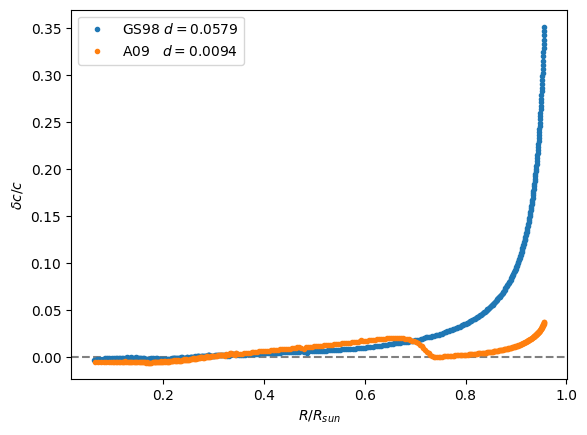

In [24]:
# calcular sigmac/c num loop para ter a certeza da correspondencia entre raio e velocidade

deltcc_gs98 = ( c_obs(model_gs98["radius"]) - model_gs98["csound"] ) / model_gs98["csound"]
deltcc_a09 = ( c_obs(model_a09["radius"]) - model_a09["csound"] ) / model_a09["csound"]

#compute mean dist to y=0 for each model
dist_gs98 = np.mean(np.abs(deltcc_gs98))
dist_a09 = np.mean(np.abs(deltcc_a09))


plt.axhline(0,color='grey', linestyle='dashed')
plt.plot(model_gs98["radius"],deltcc_gs98, label= rf"GS98 $d={dist_gs98:.4f}$" ,marker=".",linestyle = 'None')
plt.plot(model_a09["radius"],deltcc_a09  , label= rf"A09   $d={dist_a09:.4f}$" ,marker=".",linestyle = 'None')

plt.legend()
plt.ylabel(r"$\delta c /c$")
plt.xlabel(r"$R/R_{sun}$")
plt.show()

# Plot frequency vs radial order l plane

In [25]:
freqs_gs98_path  = "../solar_23.05.1/freqs_summary.txt"
column_names = ["Re(freq)", "Im(freq)", "l", "n_g", "n_p", "n_pg"]
freqs_gs98 = pd.read_csv(freqs_gs98_path, sep='\s+', header=None, names=column_names, skiprows=6)
print(freqs_gs98)

        Re(freq)  Im(freq)  l  n_g  n_p  n_pg
0     254.447971       0.0  0    0    1     1
1     396.960844       0.0  0    0    2     2
2     524.692634       0.0  0    0    3     3
3     664.458585       0.0  0    0    4     4
4     805.276623       0.0  0    0    5     5
..           ...       ... ..  ...  ...   ...
230  7374.077273       0.0  3    0   53    53
231  7508.828322       0.0  3    0   54    54
232  7643.315979       0.0  3    0   55    55
233  7777.547607       0.0  3    0   56    56
234  7911.425442       0.0  3    0   57    57

[235 rows x 6 columns]


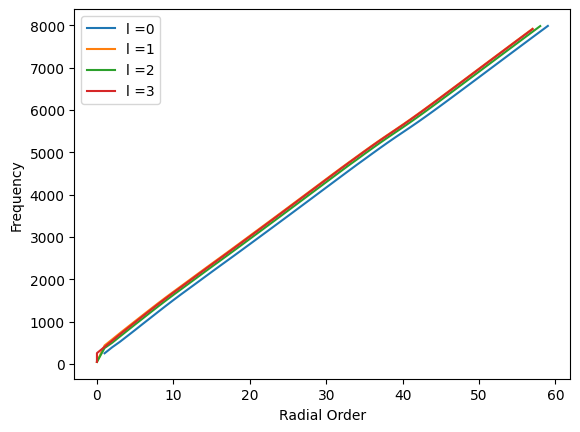

In [26]:
for l in freqs_gs98["l"].unique():
    plt.plot(freqs_gs98.query(f" l == {l}")["n_p"], freqs_gs98.query(f" l == {l}")["Re(freq)"], label = f"l ={l}")
    
plt.legend()
plt.xlabel("Radial Order")
plt.ylabel("Frequency")
plt.show()